# Assignment 2: Income Prediction based on U.S. Census data

Student Name: Kelvin Lim Wan

Student ID: 929715

# General Info

<b>Due date</b>: Friday, 16 Apr 2021 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day (both week and weekend days counted)

<b>Marks</b>: 15% of mark for class 

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/105477/pages/python-and-jupyter-notebooks?module_item_id=2613813) on Canvas (under Modules>Resources) for information on the basic setup required for this class, including an iPython notebook viewer and some handy python packages including Numpy, Scipy, Matplotlib, Scikit-Learn, and Gensim. You can use any Python built-in packages, but do not use any other 3rd party packages (the packages listed above are all fine to use); if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it. While the main focus is on correctness of your methods, you will lose marks if your code is not understandable.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board; we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.


## Overview

In this assignment, you will be working with the famous *Adult* a data set containing demographic and income data from the united states in 1994. The dataset provided for this assignment is derived from <a href="http://archive.ics.uci.edu/ml/datasets/Adult">this</a> resource. The data set consists of about 48,000 individuals each characterized through a set of 14 attributes. Your task is to predict whether the individual earns up to \\$ 50,000 a year (<=50K) or more than \\$50,000 per year (>50K).

The attributes are

|ID|Feature Name| Feature Type | Feature Values|
| :-| :-| :-| :-|
|0|age| continuous| |
|1|workclass| categorical | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, ?|
|2|fnlwgt| continuous| |
|3|education|  categorical |Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool|
|4|education-num| continuous| |
|5|marital-status|  categorical |Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse|
|6|occupation|  categorical |Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces, ?|
|7|relationship|  categorical |Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried|
|8|race|  categorical |White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black|
|9|sex|  categorical |Female, Male|
|10|capital-gain| continuous| |
|11|capital-loss| continuous| |
|12|hours-per-week| continuous| |
|13|native-country|  categorical |United-States, Cambodia, England, Puerto-Rico, Canada, Germany, India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, ?|

You can find out more about the individual attributes / values, and the origin of the data set in the <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"> data set description</a>  


You will build a number of classifiers to predict the income class based on the attributes above.


#### The following instructions hold for every question in the assignment
- leave the order of instances intact, i.e., do not shuffle the data
- do not change the names or types of variables provided by us in the code cells below
- '?' denotes an unknown value, and you should treat it as just another value for its feature in all tasks below.

## Question 1: Loading and pre-processing the data (1 mark)

You were provide two data files:

**adult.train** contains about 32,000 training instances, one instance per line in comma-separated value (csv) format. Each line contains 14 fields. The first 13 fields correspond to the features listed above, the final field denotes the class label

**adult.test** is formatted exactly like adult.train, and contains about 16,000 further instances for evaluation.


### 1a Read the data [0.5 marks]

First, you will read in the data and create traing features, training labels, test features and test labels. Do not apply any data transformations.

In [1]:
# load data


data = open("adult.train",'r').readlines()
test_data = open("adult.test",'r').readlines()

x_train = []
y_train = []
x_test = []
y_test = []

############################
## your code begins here
############################

for data_line in data:
    
    # create a clean string list of features; removing newlines
    proper_data_line = data_line.rstrip("\n").split(",")
    
    # remove all whitespaces around the features
    clean_data_line = [string.strip() for string in proper_data_line]
    
    features_list = clean_data_line[:-1]
    label = clean_data_line[-1]
    
    x_train.append(features_list)
    y_train.append(label)

for test_line in test_data:
    
    # create a clean string list of features; removing newlines
    proper_test_line = test_line.rstrip("\n").split(",")
    
    # remove all whitespaces around the features
    clean_test_line = [string.strip() for string in proper_test_line]
    
    features_list = clean_test_line[:-1]
    label = clean_test_line[-1]
    
    x_test.append(features_list)
    y_test.append(label)

############################
## your code ends here
############################

len(x_train), len(y_train), len(x_test), len(y_test), len(x_train[0]), len(x_test[0])

(32525, 32525, 16262, 16262, 14, 14)

<b>For your testing:</b>

In [3]:
assert len(x_train)==len(y_train)==32525
assert len(x_train[0])==len(x_test[0])==14

### 1b: Attribute Types [0.5 marks]

You will create three feature representations, based on the different attribute types (categorical, numeric) in the original *Adult* data.

**Your tasks**

Denote with $I$ the number of training instances; $N$ the number of numeric features in the data set; and $v_f$ the number of possible values for feature $f$.

1. Create a train data set with only numeric features `x_train_num` (size $(I\times N)$); and equivaluently a test data set `x_test_num`
2. Create a train data set with only categorical features *in a 1-hot representation* `x_train_1hot` (size $(I\times\sum_f v_f)$); and equivalently a test data set `x_test_1hot`
3. Create a train data set with both numeric and 1-hot categorical features `x_train_full` (size $I \times N+\sum_f v_f$) where the first $N$ columns represent the numerical features and the remaining columns the categorical features; and equivalently a test data set `x_test_full`

**Note:** You may use classes and functions from ```scikit-learn```.



In [6]:
from copy import deepcopy
from pandas import DataFrame
from sklearn.preprocessing import OneHotEncoder

x_train_num = []
x_test_num = []

x_train_1hot = []
x_test_1hot = []

x_train_full = []
x_test_full = []

################################
### Your code begins here ######
################################

NUMERIC_FEATURES_INDICES = [0, 2, 4, 10, 11, 12]

## Part 1
# for training data
for features in x_train:
    numeric_features = []
    for index in NUMERIC_FEATURES_INDICES:
        numeric_features.append(int(features[index]))
    x_train_num.append(numeric_features)

# for test data
for features in x_test:
    numeric_features = []
    for index in NUMERIC_FEATURES_INDICES:
        numeric_features.append(int(features[index]))
    x_test_num.append(numeric_features)

    
## Part 2
# for training data
cat_x_train = deepcopy(x_train)

# remove all numeric features
for features in cat_x_train:
    for index in reversed(NUMERIC_FEATURES_INDICES):
        del features[index]
        
# create a pandas dataframe
cat_x_train_df = DataFrame(cat_x_train)

# convert the categorical features into one-hot representation
train_encoder = OneHotEncoder()
cat_x_train_one_hot = train_encoder.fit_transform(cat_x_train_df).toarray()
for one_hot_features in cat_x_train_one_hot:
    x_train_1hot.append([int(feat) for feat in one_hot_features])

# for test data
cat_x_test = deepcopy(x_test)

# remove all numeric features
for features in cat_x_test:
    for index in reversed(NUMERIC_FEATURES_INDICES):
        del features[index]
        
# create a pandas dataframe
cat_x_test_df = DataFrame(cat_x_test)

# convert the categorical features into one-hot a representation
test_encoder = OneHotEncoder()
cat_x_test_one_hot = test_encoder.fit_transform(cat_x_test_df).toarray()
for one_hot_features in cat_x_test_one_hot:
    x_test_1hot.append([int(feat) for feat in one_hot_features])

    
## Part 3
# for training data
for i in range(len(x_train_num)):
    x_train_full.append(x_train_num[i] + x_train_1hot[i])
    
# for test data
for i in range(len(x_test_num)):
    x_test_full.append(x_test_num[i] + x_test_1hot[i])

################################
### Your code ends here ########
################################


[['State-gov', 'Bachelors', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 'United-States'], ['Self-emp-not-inc', 'Bachelors', 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 'United-States'], ['Private', 'HS-grad', 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 'United-States'], ['Private', '11th', 'Married-civ-spouse', 'Handlers-cleaners', 'Husband', 'Black', 'Male', 'United-States'], ['Private', 'Bachelors', 'Married-civ-spouse', 'Prof-specialty', 'Wife', 'Black', 'Female', 'Cuba'], ['Private', 'Masters', 'Married-civ-spouse', 'Exec-managerial', 'Wife', 'White', 'Female', 'United-States'], ['Private', '9th', 'Married-spouse-absent', 'Other-service', 'Not-in-family', 'Black', 'Female', 'Jamaica'], ['Self-emp-not-inc', 'HS-grad', 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 'United-States'], ['Private', 'Masters', 'Never-married', 'Prof-specialty', 'Not-in-family', 'White', 'Female', 'United-States'],

<b> For your testing</b>

In [5]:
assert len(x_train_1hot[0])==98
assert len(x_train_full[0])==104

## Question 2: A 0-R baseline [0.5 marks]

Implement a zero-r baseline, as introduced in the Evaluation lecture.

In [7]:
from collections import Counter

majority_class = ""
zero_r_predictions = []

############################
## your code begins here
############################

# create a dictionary of labels with their frequency in the training labels
label_counts = Counter()
for label in y_train:
    label_counts[label] += 1
    
# get the most common label
majority_class = label_counts.most_common()[0][0]

for features in x_test:
    zero_r_predictions.append(majority_class)

############################
## your code ends here
############################

print(f"The majority class is: {majority_class}")

The majority class is: <=50K


## Question 3: Feature selection [2 marks]

In this question you will implement pointwise mutual information (PMI) for feature selection (Question 3a)

In question 3a. you will use the implemented function to create a 1-R classifier based on the single 1-hot attribute  (i.e., categorical feature value) with highest PMI for class ">50K". 
```
argmax_a pmi(a=1,c=">50K")
```
In question 3b. you will apply your 1-R classifier to the test instances, and store your predicted labels in `one_r_predictions`.

<b> You should implement PMI from scratch yourself. You may use native Python libraries like math or numpy to help you, but you may not use existing implementations of PMI.</b>



### 3a. Implement PMI [1 mark]

Implement a function to compute PMI.


In [10]:
'''
PMI: A function to compute the pointwise mutual information between 
all features in the data set and a target class of interest
Input: - features for N input instances
       - labels for N input instances
       - target feature value (default=1)
       - target class (fdefault='>50K')
Output: a dictionary of the form {feature: ppmi} where each 
        feature is denoted by its ID (position in the 1-hot encoded representatoin)

'''

############################
## your code begins here
############################

from math import inf, log

def pmi(features, labels, tgt_value=1, tgt_class=">50K"):
    
    pmis = {}
    
    # probability of C
    prob_label = labels.count(tgt_class) / len(labels)
        
    for i in range(len(features[0])):
        one_count = 0
        joint_count = 0
        index = 0
        for feat in features:
            if feat[i] == tgt_value:
                one_count += 1
                if labels[index] == tgt_class:
                    joint_count += 1
            index += 1
            
        # probability of A
        prob_feat = one_count / len(features)
        
        # joing probability of A and C
        prob_joint = joint_count / len(features)
        
        # set PMI to infinity if denominator is 0 since log of infinity is infinity
        if prob_feat == 0 or prob_label == 0:
            pmis[i] = inf
            continue
        
        argument = prob_joint / (prob_feat * prob_label)
        
        # set PMI to minus infinity if argument is 0 since log of 0 is minus infinity
        if argument == 0:
            pmis[i] = - inf
        else:
            pmis[i] = log(argument, 2)
               
    return pmis


############################
## your code ends here
############################


<b>For your testing:</b>

In [11]:
test_features = [[1,1], [1,0], [0,1], [0,0]]
test_labels = [1,1,0,0]
test_pmi = pmi(test_features, test_labels, tgt_class=1)

# where the index 0 refers to "feature 1" and index 1 refers to "feature 2"
assert test_pmi[0]==1.0
assert test_pmi[1]==0.0

### 3b Create 1-R baseline [1 mark]

- Apply your PMI function to the *1_hot feature representation* of training data, and determine the (i) 1-hot feature with *highest* PMI with class '>50K' () and (ii) 1-hot feature with *lowest* (most negative) PMI with class '>50K'. Store the name (string) of the corresponding highest/lowest PMI features in `highest_pmi_feature_name` and `lowest_pmi_feature_name`, respectively.

- The feature with *highest* PMI will consitute your 1-R predictor, which you should use to predict the class labels for the test set (`one_r_predictions`)

In [12]:
one_r_predictions = []

highest_pmi_feature_name = "" # feature with highest PMI
lowest_pmi_feature_name = "" # feature with lowest PMI

############################
## your code begins here
############################

FEATURE_NAME_START_INDEX = 3
TARGET_CLASS = ">50K"
OTHER_CLASS = "<=50K"
TARGET_VALUE = 1

# compute the pmi's of each feature as a dictionary
feature_pmis = pmi(x_train_1hot, y_train, tgt_value=TARGET_VALUE, tgt_class=TARGET_CLASS)

# sort the features in ascending order of pmi
sorted_pmis = sorted(feature_pmis.items(), key=lambda x:x[1])

highest_pmi_index = sorted_pmis[-1][0]
lowest_pmi_index = sorted_pmis[0][0]

# list of all feature names ordered the same as in the one hot encoder
features_names = list(train_encoder.get_feature_names())

highest_pmi_feature_name = features_names[highest_pmi_index][FEATURE_NAME_START_INDEX:]
lowest_pmi_feature_name = features_names[lowest_pmi_index][FEATURE_NAME_START_INDEX:]

for features in x_test_1hot:
    if features[highest_pmi_index] == TARGET_VALUE:
        one_r_predictions.append(TARGET_CLASS)
    else:
        one_r_predictions.append(OTHER_CLASS)
        

############################
## your code ends here
############################

print(one_r_predictions[:10])
print(f"The feature with highest PMI for the class '>50K' is: {highest_pmi_feature_name}")
print(f"The feature with lowest PMI for the class '>50K' is: {lowest_pmi_feature_name}")

['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K']
The feature with highest PMI for the class '>50K' is: Doctorate
The feature with lowest PMI for the class '>50K' is: Preschool


## Question 4: Naive Bayes [3 marks]

We will construct three Naive Bayes classifiers

1. One for instances with only 1-hot encoded (binary) categorical attributes.
2. One for instances with only numerical attributes.
3. One for instances with the full set of numerical *and* categorical attributes, ensuring that your classifier computes posterior class probabilities $p(y|x)$ as $p(x|y)p(y)$.

For each classifier, you will 
1. Train it on the training set
2. Use the models to predict labels for the test set


### 4a Implementing the Naive Bayes classifiers [1.5 marks]

Implement three functions which train a NB classifier given the specified input feature types and predict labels for a given test set.

You may add additional quantities to your `return` statements.

<b> You may (and are, indeed, encouraged) to, use the existing NB implementations from `sklearn`. You should use the default parameterizations of these algorithms.</b> 
    
If you choose to implement your classifiers from scratch, please use Laplace smoothing (alpha=1) for the categorical feature NB.


In [13]:

##################################
## your code begins here
##################################

from sklearn.naive_bayes import BernoulliNB, GaussianNB

BINARY_FEATURES_START_INDEX = 6
CLASS_1 = "<=50K"
CLASS_2 = ">50K"
CLASS_1_INDEX = 0
CLASS_2_INDEX = 1

def nb_binary_features(train_features, train_labels, test_features):
    
    predictions = []
    
    # fit the bernoulli NB classifier to the training data using laplace smoothing of alpha 1 (default)
    classifier = BernoulliNB()
    classifier.fit(train_features, train_labels)
    
    # predict test labels by passing the test binary features into the bernoulli NB classifier
    predictions = list(classifier.predict(test_features))
    
    # get the posterior class probabilities for each feature
    post_probs = [list(prob) for prob in classifier.predict_proba(test_features)]
    
    return predictions, post_probs


def nb_continuous_features(train_features, train_labels, test_features):
    
    predictions = []
    
    # fit the gaussian NB classifier to the training data using laplace smoothing of alpha 1 (default)
    classifier = GaussianNB()
    classifier.fit(train_features, train_labels)
    
    # predict test labels by passing the test continuous features into the gaussian NB classifier
    predictions = list(classifier.predict(test_features))
    
    # get the posterior class probabilities for each feature
    post_probs = [list(prob) for prob in classifier.predict_proba(test_features)]
    
    return predictions, post_probs


def nb_full(train_features, train_labels, test_features):    
    
    predictions = []
    
    # slice the features list into continuous and binary features lists
    train_features_num = [features[:BINARY_FEATURES_START_INDEX] for features in train_features]
    train_features_1hot = [features[BINARY_FEATURES_START_INDEX:] for features in train_features]
    test_features_num = [features[:BINARY_FEATURES_START_INDEX] for features in test_features]
    test_features_1hot = [features[BINARY_FEATURES_START_INDEX:] for features in test_features]
    
    # get the prior class probabilities
    prob_less_or_equal_to_50k = train_labels.count(CLASS_1) / len(train_labels)
    prob_greater_than_50k = train_labels.count(CLASS_2) / len(train_labels)

    # get the posterior class probabilities for each feature
    post_probs_num = nb_continuous_features(train_features_num, train_labels, test_features_num)[1]
    post_probs_1hot = nb_binary_features(train_features_1hot, train_labels, test_features_1hot)[1]
    
    for i in range(len(post_probs_num)):
        # compute the "full" posterior probabilities by multiplying the continuous and binary post probabilities and
        # dividing it by the prior class probability, for each feature: P(Y|X_FULL) = P(Y) * P(X_FULL|Y) =
        # P(Y) * P(X_NUM|Y) * P(X_1HOT|Y) = P(Y) * P(X_NUM|Y) * P(Y) * P(X_1HOT|Y) / P(Y)
        # = P(Y|X_NUM) * P(Y|X_1HOT) / P(Y)
        post_prob_less_equal = (post_probs_num[i][CLASS_1_INDEX] * post_probs_1hot[i][CLASS_1_INDEX] / 
                                prob_less_or_equal_to_50k)
        post_prob_greater = (post_probs_num[i][CLASS_2_INDEX] * post_probs_1hot[i][CLASS_2_INDEX] / 
                             prob_greater_than_50k)
        
        # assign label to the one with highest posterior probability
        if post_prob_less_equal > post_prob_greater:
            predictions.append(CLASS_1)
        else:
            predictions.append(CLASS_2)
    
    return predictions

############################
## your code ends here
############################


### 4b Apply your classifiers to the data sets you created in Questions 1 and 3b [0.5 marks]

...namely, the

1. 1-hot categorical features `x_{train,test}_1hot`
2. numerical features `x_{train,test}_num`
3. combined numerical and 1-hot categorical features `x_{train,test}_full`


In [14]:
from collections import Counter

############################
## your code begins here
############################

categorical_nb_predictions = nb_binary_features(x_train_1hot, y_train, x_test_1hot)[0]
numeric_nb_predictions = nb_continuous_features(x_train_num, y_train, x_test_num)[0]
full_nb_predictions = nb_full(x_train_full, y_train, x_test_full)

############################
## your code ends here
############################

print(f"Numerical NB predicted class distribution \t {Counter(numeric_nb_predictions)}")
print(f"Categorical NB predicted class distribution\t {Counter(categorical_nb_predictions)}")
print(f"Full NB predicted class distribution\t {Counter(full_nb_predictions)}")


Numerical NB predicted class distribution 	 Counter({'<=50K': 14440, '>50K': 1822})
Categorical NB predicted class distribution	 Counter({'<=50K': 10046, '>50K': 6216})
Full NB predicted class distribution	 Counter({'<=50K': 12699, '>50K': 3563})



### 4c Explain your Naive Bayes classifier implementation on the full attribute set (numerical and binary features). [1 mark]

Please limit your answer to 2-3 sentences


From the previous functions, I retrieved the posterior probabilities for both the numerical dataset and the one-hot-encoded dataset. For each instance, I multiplied the two "partial" posterior probabilities and divided it by the prior class probability, for each class. Then I assigned each instance prediction to the label with the higher "full" posterior probability.

## Question 5: Logistic Regression [2.5 marks]

Apply a Logistic Regression classifier to the full training data set (`x_{train,test}_full`)

<b> Use the existing implementation in sklearn with default parameters. </b>

### 5a The Logistic Regression classifier [0.5 marks]

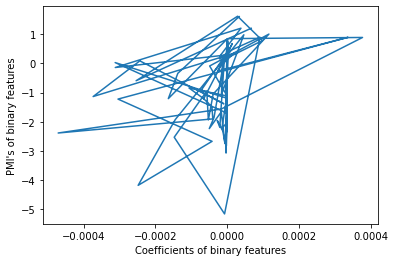

Feature with the highest PMI	 Doctorate
Feature with the second highest PMI	 Prof-school
Feature with the lowest PMI	 Preschool
Feature with the second lowest PMI	 Priv-house-serv
Feature with the highest coefficient	 Capital-loss
Feature with the second highest coefficient	 Married-civ-spouse
LR predicted class distribution	 Counter({'<=50K': 14837, '>50K': 1425})


In [16]:
from sklearn.linear_model import LogisticRegression

lr_predictions = []

############################
## your code begins here
############################

## Part a
# fit the LR classifier to the training data
classifier = LogisticRegression()
classifier.fit(x_train_full, y_train)

# predict test labels by passing the test features into the LR classifier
lr_predictions = classifier.predict(x_test_full)


## Part b

from matplotlib import pyplot

# ___ to be consistent with the slicing using in Q3b
CONTINUOUS_FEATURES_NAMES = ["___Age", "___Fnlwgt", "___Education-num", "___Capital-gain", "___Capital-loss", "___Hours-per-week"]

# get LR coefficients
parameters = classifier.coef_
all_coef = list(parameters[0])
continuous_coef = all_coef[:BINARY_FEATURES_START_INDEX]
binary_coef = all_coef[BINARY_FEATURES_START_INDEX:]

# get feature pmi's
pmis = [tup[1] for tup in feature_pmis.items()]

# plot coefficients vs pmi's for binary features only since pmi's only work on binary features
pyplot.plot(binary_coef, pmis)
pyplot.xlabel("Coefficients of binary features")
pyplot.ylabel("PMI's of binary features")
pyplot.show()

# get the two features with the highest pmi's
highest_pmi_index = sorted_pmis[-1][0]
second_highest_pmi_index = sorted_pmis[-2][0]
highest_pmi_feature_name = features_names[highest_pmi_index][FEATURE_NAME_START_INDEX:]
second_highest_pmi_feature_name = features_names[second_highest_pmi_index][FEATURE_NAME_START_INDEX:]

# get the two features with the lowest pmi's
lowest_pmi_index = sorted_pmis[0][0]
second_lowest_pmi_index = sorted_pmis[1][0]
lowest_pmi_feature_name = features_names[lowest_pmi_index][FEATURE_NAME_START_INDEX:]
second_lowest_pmi_feature_name = features_names[second_lowest_pmi_index][FEATURE_NAME_START_INDEX:]

# list of all feature names
all_features_names = CONTINUOUS_FEATURES_NAMES + features_names

# get the two features with the highest LR coefficients
coefficients = [(i, all_coef[i]) for i in range(len(all_coef))]
sorted_coefficients = sorted(coefficients, key=lambda x:x[1])
highest_coef_index = sorted_coefficients[-1][0]
second_highest_coef_index = sorted_coefficients[-2][0]
highest_coef_feature_name = all_features_names[highest_coef_index][FEATURE_NAME_START_INDEX:]
second_highest_coef_feature_name = all_features_names[second_highest_coef_index][FEATURE_NAME_START_INDEX:]

print(f"Feature with the highest PMI\t {highest_pmi_feature_name}")
print(f"Feature with the second highest PMI\t {second_highest_pmi_feature_name}")
print(f"Feature with the lowest PMI\t {lowest_pmi_feature_name}")
print(f"Feature with the second lowest PMI\t {second_lowest_pmi_feature_name}")
print(f"Feature with the highest coefficient\t {highest_coef_feature_name}")
print(f"Feature with the second highest coefficient\t {second_highest_coef_feature_name}")


############################
## your code ends here
############################

print(f"LR predicted class distribution\t {Counter(lr_predictions)}")

### 5b Inspect the learnt coefficients [2 marks]

**Part 1**
Inspect the coefficients (weights) learnt by the classifier, and compare them to the PMI values in Question 1. You should update your code above in order to achieve this. Please indicate through comments which parts of the code are relevant to question 5b.

**Part 2**
What does a high coefficient for a feature imply? For which two features does your model learn the largest coefficients? Compare your answer to the highest PMI features you detected in Q3.

A high coefficient implies that the feature is significant and powerful in predicting the instance label. For example, if age has a high coefficient and the target class (class that is attributed the binary number 1) is ">50K", all else being equal, an old person (high age) is more likely to have it's income classified as ">50K".

The two features with the largest coefficients are Capital-loss and Married-civ-spouse. 
The two features with the highest PMI's are Doctorate and Prof-school.
The two features with the lowest PMI's are Preschool and Priv-house-serv

For the logistic regression, the class that is attributed the binary number 1 (target class) is "<=50K" since LogisticRegression from scikit-learn assigns the first label in the input as the target class. For PMI, the default target class used in Q3 is ">50K". Hence, the features are not comparable. 

I have computed the two features with the lowest PMI's (highest PMI's for target class "<=50K"); let's compare the features with the highest LR coefficient and lowest PMI for simplicity: it makes sense that a high Capital-loss is correlated with "<=50K" (a low income) and similarly for the Preschool feature. In contrast, the Doctorate feature correlates with ">50K" (a high income), which is also makes sense.


## Question 6: Evaluation [1 mark]

We will evaluate our baselines and classifiers on the instances in the test set. 

Compute 
- accuracy
- macro-averaged F1 score 

for the two baselines, the three NB classifiers and the LR classifier.

**You may use existing implementations and/or Python libraries like numpy, scipy or sklearn.**

In [17]:
zero_r_acc = 0
zero_r_f1 = 0

one_r_acc = 0
one_r_f1 = 0

num_nb_acc = 0
num_nb_f1 = 0

cat_nb_acc = 0
cat_nb_f1 = 0

full_nb_acc = 0
full_nb_f1 = 0

lr_acc = 0
lr_f1 = 0

############################
## your code begins here
############################

from sklearn.metrics import accuracy_score, f1_score

# zero r
zero_r_acc = accuracy_score(y_test, zero_r_predictions)
zero_r_f1 = f1_score(y_test, zero_r_predictions, average="macro")

# one r
one_r_acc = accuracy_score(y_test, one_r_predictions)
one_r_f1 = f1_score(y_test, one_r_predictions, average="macro")

# numerical NB
num_nb_acc = accuracy_score(y_test, numeric_nb_predictions)
num_nb_f1 = f1_score(y_test, numeric_nb_predictions, average="macro")

# binary NB
cat_nb_acc = accuracy_score(y_test, categorical_nb_predictions)
cat_nb_f1 = f1_score(y_test, categorical_nb_predictions, average="macro")

# full NB
full_nb_acc = accuracy_score(y_test, full_nb_predictions)
full_nb_f1 = f1_score(y_test, full_nb_predictions, average="macro")

# LR
lr_acc = accuracy_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions, average="macro")

############################
## your code ends here
############################

print(f"Zero R\t\tAccuracy: {round(zero_r_acc, 2)}\tMacro F1: {round(zero_r_f1, 2)}")
print(f"One  R\t\tAccuracy: {round(one_r_acc, 2)}\tMacro F1: {round(one_r_f1, 2)}")
print(f"NB Num \t\tAccuracy: {round(num_nb_acc, 2)}\tMacro F1: {round(num_nb_f1, 2)}")
print(f"NB Cat \t\tAccuracy: {round(cat_nb_acc, 2)}\tMacro F1: {round(cat_nb_f1, 2)}")
print(f"NB Full \tAccuracy: {round(full_nb_acc, 2)}\tMacro F1: {round(full_nb_f1, 2)}")
print(f"LR \t\tAccuracy: {round(lr_acc, 2)}\tMacro F1: {round(lr_f1, 2)}")

Zero R		Accuracy: 0.76	Macro F1: 0.43
One  R		Accuracy: 0.77	Macro F1: 0.46
NB Num 		Accuracy: 0.8	Macro F1: 0.64
NB Cat 		Accuracy: 0.76	Macro F1: 0.72
NB Full 	Accuracy: 0.83	Macro F1: 0.76
LR 		Accuracy: 0.8	Macro F1: 0.63


## Question 7: Discussion [5 marks]

Critically analyze the performance of the models by answering the following questions. 

**(a)** The three Naive Bayes (NB) classifiers lead to different performance. Which of the three NB classifiers performs best, and why do you think it is the case? **[1 mark]**

**(b)** There is a systematic difference between Accuracy and F1 score, across all models. Describe and explain the difference in the context of the data set. **[1 mark]**

**(c)** Assume that your best classifier will be deployed in a bank to decide whether a customer will be granted a loan, or not. A loan will be granted if the classifier predicts an income of ">50K", othewise it won't. The bank manager wants to avoid falsely granting a loan to an applicant with insufficient income by all means. Can you reassure the bank manager with the evaluation results in Q7 that your classifier is adequate? If not, describe an alternative evaluation metric and explain why it is more appropriate.

**(d)** Do you observe a clear difference in performance between NB and Logistic Regression (LR) in Q7? Referring to the number of parameters and assumptions underlying each model, provide one reason why NB might outperform LR, and one reason why LR might outperform NB. In your answer, refer back to the *Adult* data set used in this assignment. **[1 mark]**

**(e)** Assume that you have access to a (hypothetical) infinitely large U.S. census database (i.e., an enormous version of the *Adult* data set used in this assignment). Is it true that Logistic Regression, but not Naive Bayes, will achieve perfect test set performance? Why (not)? **[1 mark]**

<b>We expect a maximum of 2-3 sentences per questinon.

(a) The full NB classifier performs best because it captures all the features and uses them to predict the labels. In contrast, the continuous and binary NB classifiers only use a fraction of the features to predict the labels. The full NB classifier is the most informative and results in the highest accuracy and F1 score since it has the most data points (features).

(b) Accuracy puts more emphasis on the true positives and true negatives in the dataset whereas F1 score captures the false postivies and false negatives more. Accuracy is more informative when the class distribution is similar while F1 score is a better metric when there are imbalanced classes in the dataset.

(c) The higher the F1 score, the less likely will the bank manager falsely grant a loan to an applicant. A more suitable metric is the False Positive Rate. It computes the ratio of false positives to the number of incorrectly labelled instances. Hence it would highlight the rate of falsely granting a loan rather than also highlighting the rate of falsely not granting a loan (false negative), which is what the F1 score captures.

(d) For this dataset, the full NB classifier outperforms the LR model by a small margin. They both use the same number of parameters (104- the number of features) but their model assumptions differ. NB will likely outperform LR if there is a small training data since NB is based on the joint density function whereas LR estimates may overfit the data. For these same reasons, LR will likely outperform NB for a large training data. Since the binary features are broken down into one-hot-representation in the Adult dataset, the features are most likely conditionally independent, and hence NB outperforms LR even though the dataset is large.

(e) Assume that the training and test data sets come from the same empirical data and there is no outlier in the data. With an infinitely large dataset, the loss function of a LR model will be completely (optimally) minimised. Hence, the LR coefficients will be 100% accurate and will achieve perfect test set performance. This is not true if the training and test data sets come from distinct empirical data or there are outliers in the data. A NB classifier still won't achieve perfect results because of it's strong assumption on conditional independence which doesn't disappear over large data.

## Final thoughts ...

Do you think it is ethical and safe to build and deploy income-level classifiers based on the set of attributes provided with the data set? Could such a classifier do harm if not developed, tested and deployed carefully?

When predicting the income of a person, should demographic attributes like 'gender' or 'race' even be considered? Due to historical events there are systematic income differences between men/women and people of different ethnicities. But no doubt these are *correlations* and not factors to be used to *predict* income in the future. 

But ML models are only as good as their input data: a naively developed ML algorithm will reflect, and often amplify, biases in the data.

In the last 1-2 weeks of this subject we will discuss ethics in machine learning and look at questions such as
- historical artifacts which lead to biased data sets, and hence potentially biased ML algorithms
- how to determine whether an algorithm is indeed biased
- how to mitigate bias in the data and in algorithms

